<a href="https://colab.research.google.com/github/layalgt/Reinforcement-Learning-Project/blob/main/Without%20Cost/Without_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PART I: Analysis at Fixed Learning Parameters**

##**First: Setting things up**

In [ ]:
#Start by cloning the repository
!git clone https://github.com/andredelft/flock-learning.git
%cd flock-learning

Cloning into 'flock-learning'...
remote: Enumerating objects: 3724, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 3724 (delta 110), reused 122 (delta 84), pack-reused 3556 (from 1)
Receiving objects: 100% (3724/3724), 1.22 GiB | 26.38 MiB/s, done.
Resolving deltas: 100% (2520/2520), done.
Updating files: 100% (2257/2257), done.
/content/flock-learning/flock-learning


In [ ]:
#Installing all needed requirements
!pip install -r requirements.txt

  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.17.2.zip (6.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached regex-2020.2.20.tar.gz (681 kB)
  Preparing metadata (setup.py) ... done
  Using cached scipy-1.3.1.tar.gz (23.6 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


##**Importing the needed packages**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import json
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from collections import Counter
import matplotlib.cm as cm
import os

##**Running a simulation to train the birds and then see if they learnt the optimal policy**



In [ ]:
#Calling the Field function to generate a simulation of 100 birds
import birds
import field
importlib.reload(birds)   #reloading to turn off the gradient reward
importlib.reload(field)
from birds import Birds     #to use the updated class Birds (without gradient reward)
from field import Field

Field(
    numbirds=100,
    sim_length=10000,
    record_data=True,
    record_every=500,          #saves data every 500 steps
    plot = False,              #turns off plotting
    Q_every=1000,              #saves Q-tables every 1000 steps
    comment='Q-learning test'  #uses Q-learning algorithm
)


Record files with tag 20250624-150635 initalized
Delta = 0.49951836610272826
Recorded up to timestep 0
Delta = 0.4961225422953818
Recorded up to timestep 500
Delta = 0.49331656759640297
Recorded up to timestep 1000
Delta = 0.49152263374485594
Recorded up to timestep 1500
Delta = 0.4898353909465021
Recorded up to timestep 2000
Delta = 0.48835238530711783
Recorded up to timestep 2500
Delta = 0.48689681450998323
Recorded up to timestep 3000
Delta = 0.48592440176802315
Recorded up to timestep 3500
Delta = 0.4846913580246914
Recorded up to timestep 4000
Delta = 0.48365797896662094
Recorded up to timestep 4500
Delta = 0.4825514403292181
Recorded up to timestep 5000
Delta = 0.48149519890260634
Recorded up to timestep 5500
Delta = 0.48069958847736627
Recorded up to timestep 6000
Delta = 0.47964791952446273
Recorded up to timestep 6500
Delta = 0.47885383325712544
Recorded up to timestep 7000
Delta = 0.47809937509525985
Recorded up to timestep 7500
Delta = 0.4773632068282274
Recorded up to times

In [ ]:
###Saving the files:
base_dir = '/content/flock-learning/data'
prefix = '20250623-152238'
zip_path = f'/content/{prefix}.zip'

!cd "{base_dir}" && zip -r "{zip_path}" {prefix}*

from google.colab import files
files.download(zip_path)

  adding: 20250624-150635-Delta.npy (deflated 17%)
  adding: 20250624-150635-instincts.json (deflated 87%)
  adding: 20250624-150635-Q/ (stored 0%)
  adding: 20250624-150635-Q/00000000.npy (deflated 6%)
  adding: 20250624-150635-Q/00004000.npy (deflated 6%)
  adding: 20250624-150635-Q/00010000.npy (deflated 6%)
  adding: 20250624-150635-Q/00003000.npy (deflated 6%)
  adding: 20250624-150635-Q/00005000.npy (deflated 6%)
  adding: 20250624-150635-Q/00001000.npy (deflated 6%)
  adding: 20250624-150635-Q/00008000.npy (deflated 6%)
  adding: 20250624-150635-Q/00009000.npy (deflated 6%)
  adding: 20250624-150635-Q/00002000.npy (deflated 6%)
  adding: 20250624-150635-Q/00007000.npy (deflated 6%)
  adding: 20250624-150635-Q/00006000.npy (deflated 6%)
  adding: 20250624-150635-Q.npy (deflated 6%)
  adding: 20250624-150635-v.npy (deflated 66%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

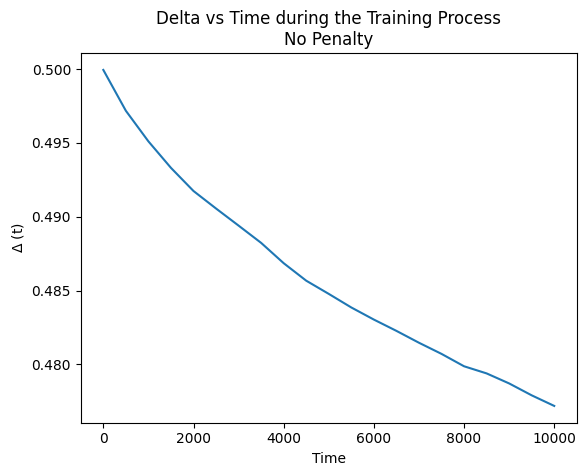

In [ ]:
from plot import plot_Delta

plot_Delta('data/20250623-152338-Delta.npy')

# Add missing labels and title
plt.xlabel('Time')
plt.ylabel(r'$\Delta$ (t)')
plt.title('Delta vs Time during the Training Process\nNo Penalty')
plt.show()


##**Training for $t = 20000$**

In [ ]:
Field(
    numbirds=100,
    sim_length=20000,
    record_data=True,
    record_every=500,
    plot = False,
    Q_every=1000,
    comment='Q-learning test'
)


Record files with tag 20250623-153051 initalized
Delta = 0.4992257277853986
Recorded up to timestep 0
Delta = 0.4958451455570797
Recorded up to timestep 500
Delta = 0.49322206980643196
Recorded up to timestep 1000
Delta = 0.49102880658436215
Recorded up to timestep 1500
Delta = 0.4892135345221765
Recorded up to timestep 2000
Delta = 0.4880018289894833
Recorded up to timestep 2500
Delta = 0.48633897271757354
Recorded up to timestep 3000
Delta = 0.4851074531321445
Recorded up to timestep 3500
Delta = 0.4836960829141899
Recorded up to timestep 4000
Delta = 0.48259411675049535
Recorded up to timestep 4500
Delta = 0.4816095107453132
Recorded up to timestep 5000
Delta = 0.48076207895137935
Recorded up to timestep 5500
Delta = 0.47969212010364276
Recorded up to timestep 6000
Delta = 0.4789117512574303
Recorded up to timestep 6500
Delta = 0.477946959304984
Recorded up to timestep 7000
Delta = 0.47701417466849566
Recorded up to timestep 7500
Delta = 0.4763145861911294
Recorded up to timestep 80

In [ ]:
##Saving files
base_dir = '/content/flock-learning/data'
prefix = '20250623-153051'
zip_path = f'/content/{prefix}.zip'

!cd "{base_dir}" && zip -r "{zip_path}" {prefix}*

from google.colab import files
files.download(zip_path)

  adding: 20250623-153051-Delta.npy (deflated 9%)
  adding: 20250623-153051-instincts.json (deflated 88%)
  adding: 20250623-153051-Q/ (stored 0%)
  adding: 20250623-153051-Q/00006000.npy (deflated 6%)
  adding: 20250623-153051-Q/00002000.npy (deflated 6%)
  adding: 20250623-153051-Q/00005000.npy (deflated 6%)
  adding: 20250623-153051-Q/00012000.npy (deflated 6%)
  adding: 20250623-153051-Q/00001000.npy (deflated 6%)
  adding: 20250623-153051-Q/00009000.npy (deflated 6%)
  adding: 20250623-153051-Q/00014000.npy (deflated 6%)
  adding: 20250623-153051-Q/00010000.npy (deflated 6%)
  adding: 20250623-153051-Q/00016000.npy (deflated 6%)
  adding: 20250623-153051-Q/00007000.npy (deflated 6%)
  adding: 20250623-153051-Q/00020000.npy (deflated 6%)
  adding: 20250623-153051-Q/00019000.npy (deflated 6%)
  adding: 20250623-153051-Q/00000000.npy (deflated 6%)
  adding: 20250623-153051-Q/00004000.npy (deflated 6%)
  adding: 20250623-153051-Q/00017000.npy (deflated 6%)
  adding: 20250623-153051-Q/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

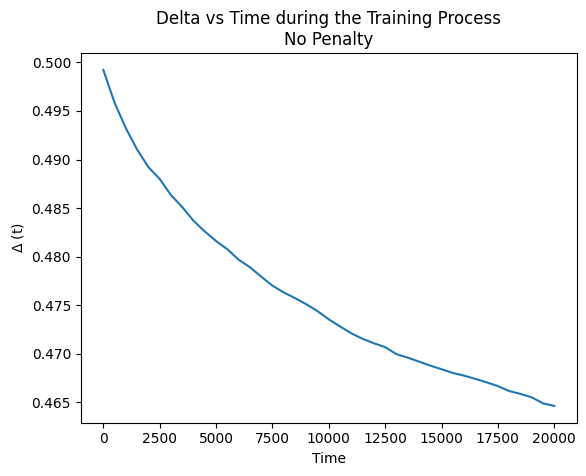

In [ ]:
plot_Delta('data/20250623-153051-Delta.npy')
plt.xlabel('Time')
plt.ylabel(r'$\Delta$ (t)')
plt.title('Delta vs Time during the Training Process\nNo Penalty')
plt.show()


##**Analyzing the learnt Q-tables for $t = 20000$**
We will compare the $Q$-table at $t =0$ and at $t_\text{final}$ (i.e. the $Q$-table reached at the end of the training episode)

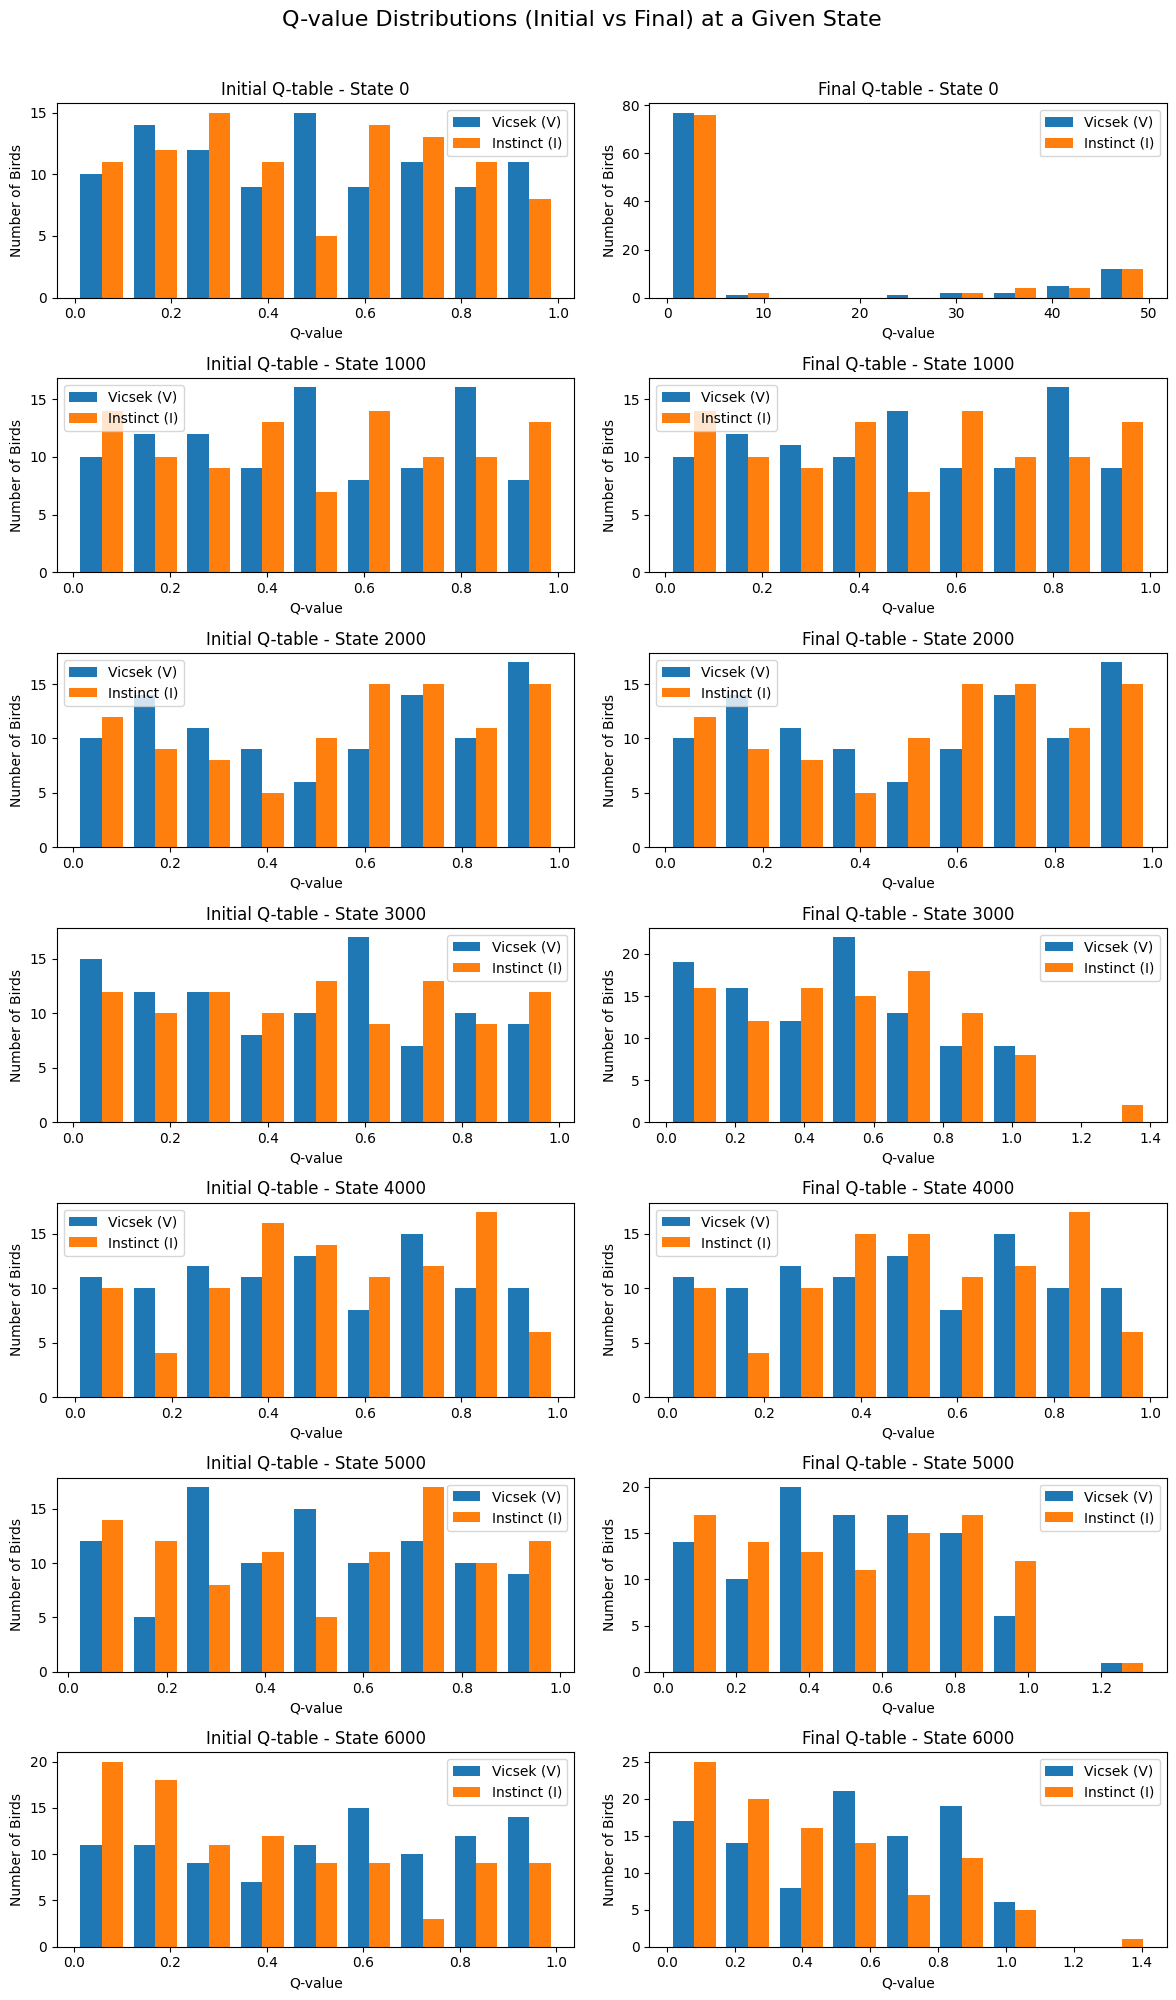

In [ ]:
Q_tables_i = np.load('data/20250623-153051-Q/00000000.npy')
Q_tables_f = np.load('data/20250623-153051-Q/00020000.npy')
#print(Q_tables_i.shape, Q_tables_f.shape)

# State indices to plot
state_indices = np.arange(0, 7000, 1000)

# Create subplots
fig, axes = plt.subplots(nrows=len(state_indices), ncols=2, figsize=(12, 3 * len(state_indices)))
fig.suptitle("Q-value Distributions (Initial vs Final) at a Given State", fontsize=16)

for idx, state_index in enumerate(state_indices):
    q_i = Q_tables_i[:, state_index, :]
    q_f = Q_tables_f[:, state_index, :]

    q_vicsek_i = q_i[:, 0]
    q_instinct_i = q_i[:, 1]
    q_vicsek_f = q_f[:, 0]
    q_instinct_f = q_f[:, 1]

    bins_i = np.linspace(min(q_vicsek_i.min(), q_instinct_i.min()), max(q_vicsek_i.max(), q_instinct_i.max()), 10)
    centers_i = 0.5 * (bins_i[1:] + bins_i[:-1])
    width_i = (bins_i[1] - bins_i[0]) * 0.4

    bins_f = np.linspace(min(q_vicsek_f.min(), q_instinct_f.min()), max(q_vicsek_f.max(), q_instinct_f.max()), 10)
    centers_f = 0.5 * (bins_f[1:] + bins_f[:-1])
    width_f = (bins_f[1] - bins_f[0]) * 0.4

    ax_i = axes[idx, 0]
    counts_v_i, _ = np.histogram(q_vicsek_i, bins=bins_i)
    counts_i_i, _ = np.histogram(q_instinct_i, bins=bins_i)
    ax_i.bar(centers_i - width_i/2, counts_v_i, width=width_i, label='Vicsek (V)')
    ax_i.bar(centers_i + width_i/2, counts_i_i, width=width_i, label='Instinct (I)')
    ax_i.set_title(f'Initial Q-table - State {state_index}')
    ax_i.set_xlabel('Q-value')
    ax_i.set_ylabel('Number of Birds')
    ax_i.legend()

    ax_f = axes[idx, 1]
    counts_v_f, _ = np.histogram(q_vicsek_f, bins=bins_f)
    counts_i_f, _ = np.histogram(q_instinct_f, bins=bins_f)
    ax_f.bar(centers_f - width_f/2, counts_v_f, width=width_f, label='Vicsek (V)')
    ax_f.bar(centers_f + width_f/2, counts_i_f, width=width_f, label='Instinct (I)')
    ax_f.set_title(f'Final Q-table - State {state_index}')
    ax_f.set_xlabel('Q-value')
    ax_f.set_ylabel('Number of Birds')
    ax_f.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


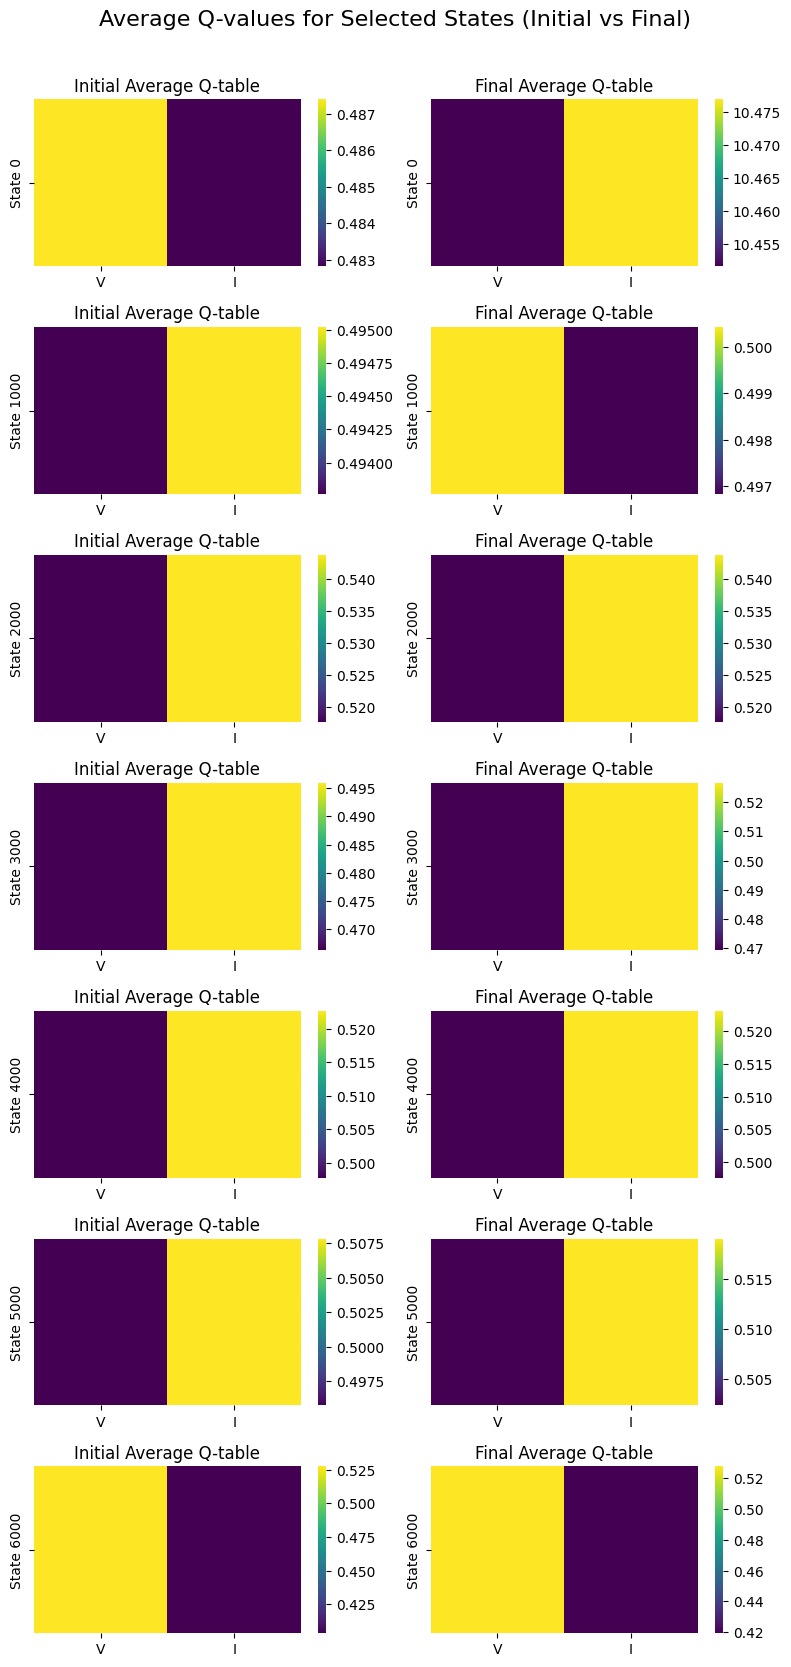

In [ ]:
Q_avg_i = np.mean(Q_tables_i, axis=0)
Q_avg_f = np.mean(Q_tables_f, axis=0)
#print(Q_avg_i.shape, Q_avg_f.shape)

state_indices = np.arange(0, 7000, 1000)

n = len(state_indices)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(8, 2.5 * n))

for idx, state_index in enumerate(state_indices):
    sns.heatmap(Q_avg_i[state_index].reshape(1, -1),
                cmap='viridis', ax=axes[idx, 0],
                xticklabels=['V', 'I'],
                yticklabels=[f'State {state_index}'],
                cbar=True)
    axes[idx, 0].set_title(f'Initial Average Q-table')


    sns.heatmap(Q_avg_f[state_index].reshape(1, -1),
                cmap='viridis', ax=axes[idx, 1],
                xticklabels=['V', 'I'],
                yticklabels=[f'State {state_index}'],
                cbar=True)
    axes[idx, 1].set_title(f'Final Average Q-table')


fig.suptitle("Average Q-values for Selected States (Initial vs Final)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


##**Varying the learning parameters**
We define a range of parameter values, and we run a simulation for each value. For every simulation run, the corresponding evolution of $\Delta(t)$ is recorded and plotted.

##**Start with the learning parameter: $\alpha$**

In [ ]:
alphas = np.arange(0,1.1,0.1)

for alpha in alphas:
    Field(
        100,
        sim_length=5000,
        alpha=alpha,
        learning_alg='Q',
        record_data=True,
        plot=False
    )


Record files with tag 20250623-172723 initalized
Delta = 0.5003764670019814
Recorded up to timestep 0
Delta = 0.5003764670019814
Recorded up to timestep 500
Delta = 0.5003764670019814
Recorded up to timestep 1000
Delta = 0.5003764670019814
Recorded up to timestep 1500
Delta = 0.5003764670019814
Recorded up to timestep 2000
Delta = 0.5003764670019814
Recorded up to timestep 2500
Delta = 0.5003764670019814
Recorded up to timestep 3000
Delta = 0.5003764670019814
Recorded up to timestep 3500
Delta = 0.5003764670019814
Recorded up to timestep 4000
Delta = 0.5003764670019814
Recorded up to timestep 4500
Delta = 0.5003764670019814
Recorded up to timestep 5000
Record files with tag 20250623-172754 initalized
Delta = 0.5001021185794848
Recorded up to timestep 0
Delta = 0.49674897119341566
Recorded up to timestep 500
Delta = 0.4944429202865417
Recorded up to timestep 1000
Delta = 0.492223746380125
Recorded up to timestep 1500
Delta = 0.4904511507392166
Recorded up to timestep 2000
Delta = 0.4890

In [ ]:
#NOTE: I am sure there is a more efficient way to do the below, but despite all my attempts to modify
#the original codebase to save the files in folder for easier access, I didn't manage to, so I had to do it as per below

f0  = np.load("data/20250623-172723-Delta.npy")
f01 = np.load("data/20250623-172754-Delta.npy")
f02 = np.load("data/20250623-172824-Delta.npy")
f03 = np.load("data/20250623-172853-Delta.npy")
f04 = np.load("data/20250623-172922-Delta.npy")
f05 = np.load("data/20250623-172950-Delta.npy")
f06 = np.load("data/20250623-173019-Delta.npy")
f07 = np.load("data/20250623-173048-Delta.npy")
f08 = np.load("data/20250623-173122-Delta.npy")
f09 = np.load("data/20250623-173153-Delta.npy")
f1  = np.load("data/20250623-173222-Delta.npy")

delta_dict = {
    "f0": f0, "f01": f01, "f02": f02, "f03": f03, "f04": f04,
    "f05": f05, "f06": f06, "f07": f07, "f08": f08, "f09": f09, "f1": f1}

/tmp/ipython-input-42-972725176.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(delta_list))  # or 'Set1' for vivid contrast


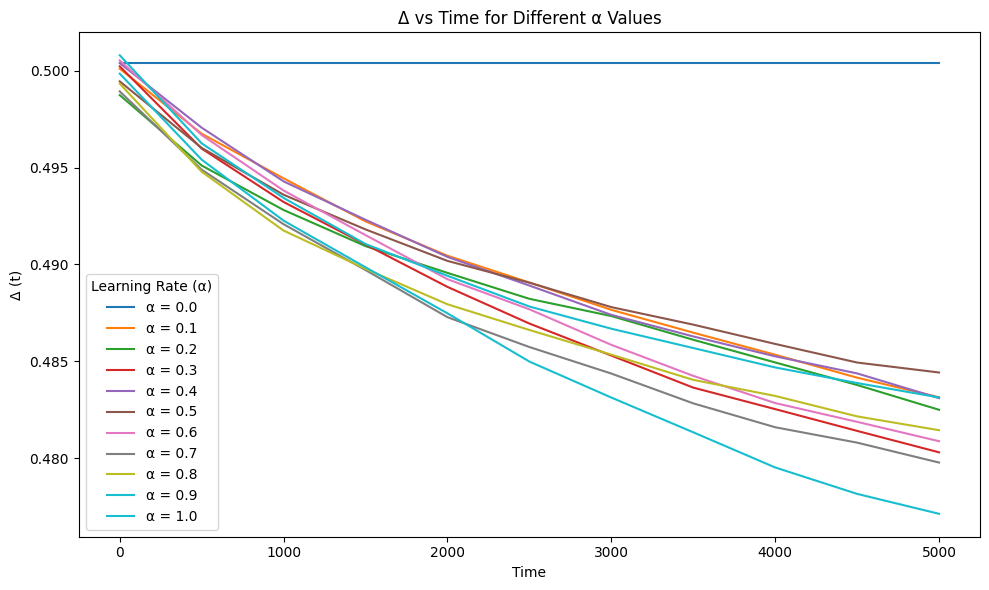

In [ ]:
delta_list = [f0, f01, f02, f03, f04, f05, f06, f07, f08, f09, f1]
alphas = [round(i * 0.1, 1) for i in range(len(delta_list))]

#Each Delta is recorded every 500 steps up to 5000
timesteps = np.arange(0, len(delta_list[0]) * 500, 500)

#Defining the colormap
cmap = cm.get_cmap('tab10', len(delta_list))

plt.figure(figsize=(10, 6))
for idx, (delta, alpha) in enumerate(zip(delta_list, alphas)):
    plt.plot(timesteps, delta, label=fr'\alpha = {alpha}', color=cmap(idx))

plt.xlabel("Time")
plt.ylabel("Δ (t)")
plt.title("Δ vs Time for Different α Values")
plt.legend(title=r'Learning Rate ($\alpha$)')
plt.tight_layout()
plt.show()


##**Looking at the Exploration Rate: $\epsilon$**

In [ ]:
epsilon = np.arange(0,1.1,0.1)

for e in epsilon:
    print(f"Running simulation with epsilon = {e}")  #added to track progress

    Field(
        100,
        sim_length=8000,
        epsilon = e,
        learning_alg='Q',
        record_data=True,
        plot=False    )


Running simulation with epsilon = 0.0
Record files with tag 20250623-180155 initalized
Delta = 0.49994970278920897
Recorded up to timestep 0
Delta = 0.4971391556165219
Recorded up to timestep 500
Delta = 0.49522481329065693
Recorded up to timestep 1000
Delta = 0.4939201341258954
Recorded up to timestep 1500
Delta = 0.49273738759335467
Recorded up to timestep 2000
Delta = 0.4921734491693339
Recorded up to timestep 2500
Delta = 0.49216278006401465
Recorded up to timestep 3000
Delta = 0.49216125590611187
Recorded up to timestep 3500
Delta = 0.49216125590611187
Recorded up to timestep 4000
Delta = 0.49216125590611187
Recorded up to timestep 4500
Delta = 0.49216125590611187
Recorded up to timestep 5000
Delta = 0.49216125590611187
Recorded up to timestep 5500
Delta = 0.49216125590611187
Recorded up to timestep 6000
Delta = 0.49216125590611187
Recorded up to timestep 6500
Delta = 0.49216125590611187
Recorded up to timestep 7000
Delta = 0.49216125590611187
Recorded up to timestep 7500
Delta = 

In [ ]:
f0  = np.load("data/20250623-180155-Delta.npy")
f01 = np.load("data/20250623-180247-Delta.npy")
f02 = np.load("data/20250623-180337-Delta.npy")
f03 = np.load("data/20250623-180425-Delta.npy")
f04 = np.load("data/20250623-180514-Delta.npy")
f05 = np.load("data/20250623-180601-Delta.npy")
f06 = np.load("data/20250623-180649-Delta.npy")
f07 = np.load("data/20250623-180737-Delta.npy")
f08 = np.load("data/20250623-180824-Delta.npy")
f09 = np.load("data/20250623-180911-Delta.npy")
f1  = np.load("data/20250623-180957-Delta.npy")

delta_dict = {
    "f0": f0, "f01": f01, "f02": f02, "f03": f03, "f04": f04,
    "f05": f05, "f06": f06, "f07": f07, "f08": f08, "f09": f09, "f1": f1
}


/tmp/ipython-input-45-28972037.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(delta_list))  # or 'Set1' for vivid contrast


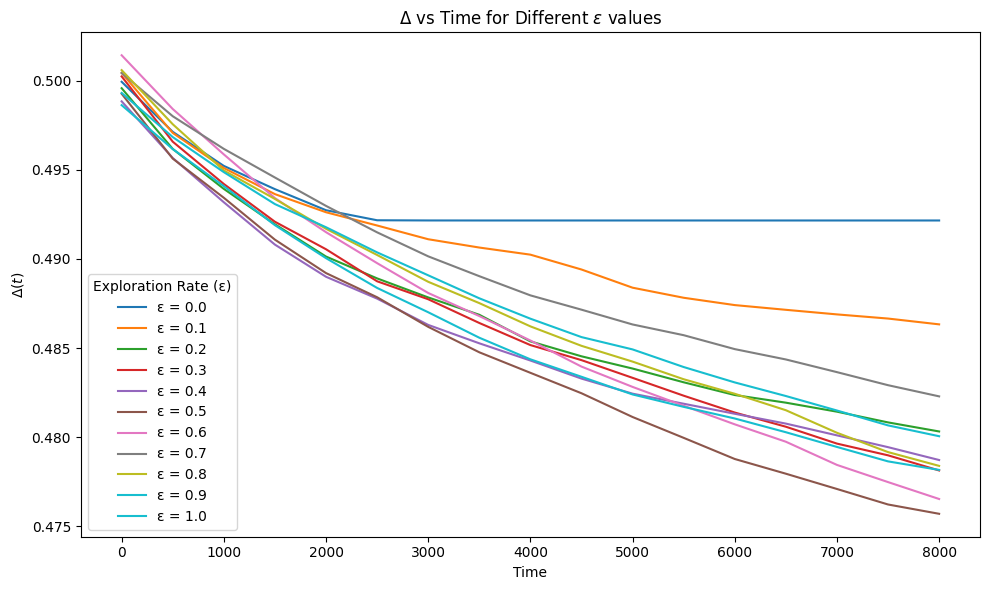

In [ ]:
delta_list = [f0, f01, f02, f03, f04, f05, f06, f07, f08, f09, f1]
e = [round(i * 0.1, 1) for i in range(len(delta_list))]

timesteps = np.arange(0, len(delta_list[0]) * 500, 500)

cmap = cm.get_cmap('tab10', len(delta_list))

plt.figure(figsize=(10, 6))
for idx, (delta, eps) in enumerate(zip(delta_list, e)):
    plt.plot(timesteps, delta, label= fr'$\epsilon$ = {eps}', color=cmap(idx))

plt.title('$\Delta$ vs Time for Different $\epsilon$ values')
plt.xlabel('Time')
plt.ylabel(r'$\Delta(t)$')
plt.legend(title=r'Exploration Rate ($\epsilon$)')
plt.tight_layout()
plt.show()


##**Looking at the Discount Factor: $\gamma$**

In [ ]:
gamma = np.arange(0,1,0.1)

for g in gamma:
    print(f"Running simulation with gamma = {g}")
    Field(
        100,
        sim_length=5000,
        gamma = g,
        learning_alg='Q',
        record_data=True,
        plot=False )


Running simulation with gamma = 0.0
Record files with tag 20250623-195502 initalized
Delta = 0.5005121170553269
Recorded up to timestep 0
Delta = 0.496203322664228
Recorded up to timestep 500
Delta = 0.49324798049077884
Recorded up to timestep 1000
Delta = 0.4903551287913428
Recorded up to timestep 1500
Delta = 0.4880124980948026
Recorded up to timestep 2000
Delta = 0.4862901996646853
Recorded up to timestep 2500
Delta = 0.48444444444444446
Recorded up to timestep 3000
Delta = 0.4831580551745161
Recorded up to timestep 3500
Delta = 0.48187776253619874
Recorded up to timestep 4000
Delta = 0.4804877305288828
Recorded up to timestep 4500
Delta = 0.479254686785551
Recorded up to timestep 5000
Running simulation with gamma = 0.1
Record files with tag 20250623-195537 initalized
Delta = 0.4997195549458924
Recorded up to timestep 0
Delta = 0.4947965249199817
Recorded up to timestep 500
Delta = 0.49068891937204695
Recorded up to timestep 1000
Delta = 0.4877000457247371
Recorded up to timestep 1

In [ ]:
f0  = np.load("data/20250623-195502-Delta.npy")
f01 = np.load("data/20250623-195537-Delta.npy")
f02 = np.load("data/20250623-195611-Delta.npy")
f03 = np.load("data/20250623-195643-Delta.npy")
f04 = np.load("data/20250623-195718-Delta.npy")
f05 = np.load("data/20250623-195752-Delta.npy")
f06 = np.load("data/20250623-195826-Delta.npy")
f07 = np.load("data/20250623-195859-Delta.npy")
f08 = np.load("data/20250623-195933-Delta.npy")
f09 = np.load("data/20250623-200006-Delta.npy")

delta_dict = {
    "f0": f0, "f01": f01, "f02": f02, "f03": f03, "f04": f04,
    "f05": f05, "f06": f06, "f07": f07, "f08": f08, "f09": f09}


/tmp/ipython-input-18-3316535532.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(delta_list))  # or 'Set1' for vivid contrast


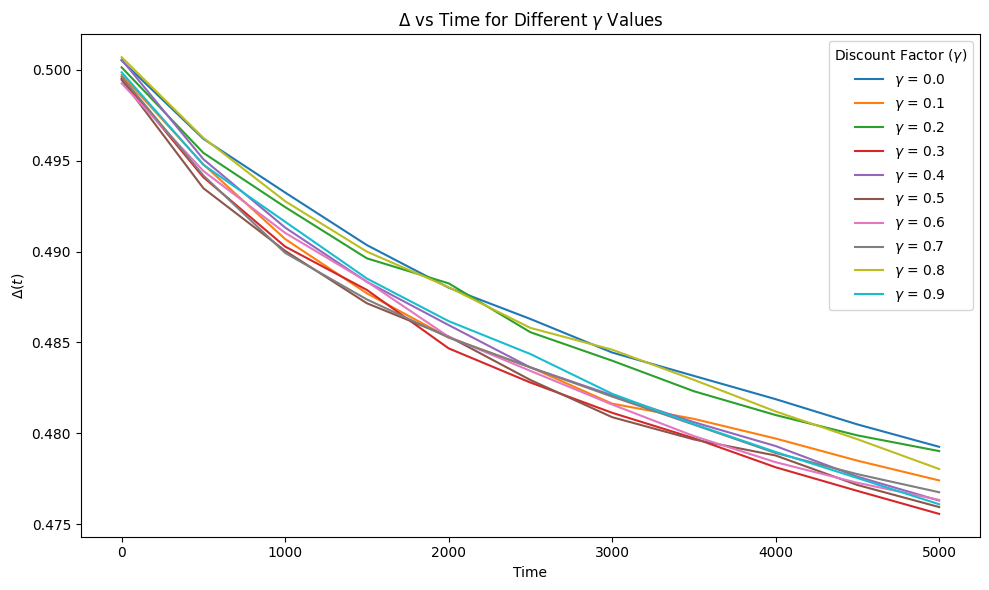

In [ ]:
delta_list = [f0, f01, f02, f03, f04, f05, f06, f07, f08, f09]
gammas = [round(i * 0.1, 1) for i in range(len(delta_list))]

timesteps = np.arange(0, len(delta_list[0]) * 500, 500)

cmap = cm.get_cmap('tab10', len(delta_list))


plt.figure(figsize=(10, 6))
for idx, (delta, gamma) in enumerate(zip(delta_list, gammas)):
    plt.plot(timesteps, delta, label=fr'$\gamma$ = {gamma}', color=cmap(idx))

plt.xlabel("Time")
plt.ylabel(r'$\Delta(t)$')
plt.title(r'$\Delta$ vs Time for Different $\gamma$ Values')
plt.legend(title=r'Discount Factor ($\gamma$)')
plt.tight_layout()
plt.show()
